# **Project Title:** House Price Prediction for Properties in Major Cities of Pakistan


`Dataset`: [Pakistan House Price Dataset](https://www.kaggle.com/datasets/jillanisofttech/pakistan-house-price-dataset/data)  


# **About Dataset**
## Context
The dataset is scraped from zameen.com which is Pakistan's top real estate platform. It contains listings of properties from five major cities of Pakistan.  
The aim of this project is to perform Exploratory Data Analysis (EDA) to uncover insights and use Machine Learning models to predict property price based on the given attributes.  

### **Content**
#### Column Descriptions:
`property_id`: Unique identifier for each property.  
`location_id`: Unique identifier for each location within a city.  
`page_url`: The URL of the webpage where the property was published.  
`property_type`: Categorization of the property into six types: House, FarmHouse, Upper Portion, Lower Portion, Flat, or Room.  
`price`: The price of the property, which is the dependent feature in this dataset.  
`city`: The city where the property is located. The dataset includes five cities: Lahore, Karachi, Faisalabad, Rawalpindi, and Islamabad.  
`province`: The state or province where the city is located.  
`location`: Different types of locations within each city.  
`latitude` and `longitude`: Geographic coordinates of the cities.  




---

In [170]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


### Load and Explore Dataset

In [171]:
df = pd.read_csv('zameen_property.csv')
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [173]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


---

### Data Cleaning / Preprocessing

In [174]:
#check for null values
df.isnull().sum().sort_values(ascending=False)

agent            44072
agency           44071
property_id          0
location_id          0
Area Size            0
Area Type            0
date_added           0
bedrooms             0
purpose              0
area                 0
baths                0
longitude            0
latitude             0
province_name        0
city                 0
location             0
price                0
property_type        0
page_url             0
Area Category        0
dtype: int64

In [175]:
# 'agent' and 'agency' columns are not significant for our analysis, so we can drop them
df = df.drop(['agent', 'agency'], axis=1)

In [176]:
df.drop(['page_url', 'property_id','location_id'], axis=1, inplace=True)

In [177]:
df[df['price'] == 0]

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
66537,House,0,Range Road,Rawalpindi,Punjab,33.598593,73.018003,0,5 Marla,For Rent,0,05-06-2019,Marla,5.0,0-5 Marla
91608,Farm House,0,Gadap Road,Karachi,Sindh,25.053956,67.253365,0,8 Kanal,For Sale,0,06-21-2019,Kanal,8.0,5-10 Kanal
132855,House,0,Gulshan Abad,Rawalpindi,Punjab,33.530556,73.061264,0,10 Marla,For Sale,0,07-05-2019,Marla,10.0,5-10 Marla


In [178]:
#checking duplicates
df.duplicated().sum()

np.int64(20489)

In [179]:
df.drop_duplicates(inplace=True)

In [180]:
#convertin 'date_added' to date format
df['date_added'] = pd.to_datetime(df['date_added'])

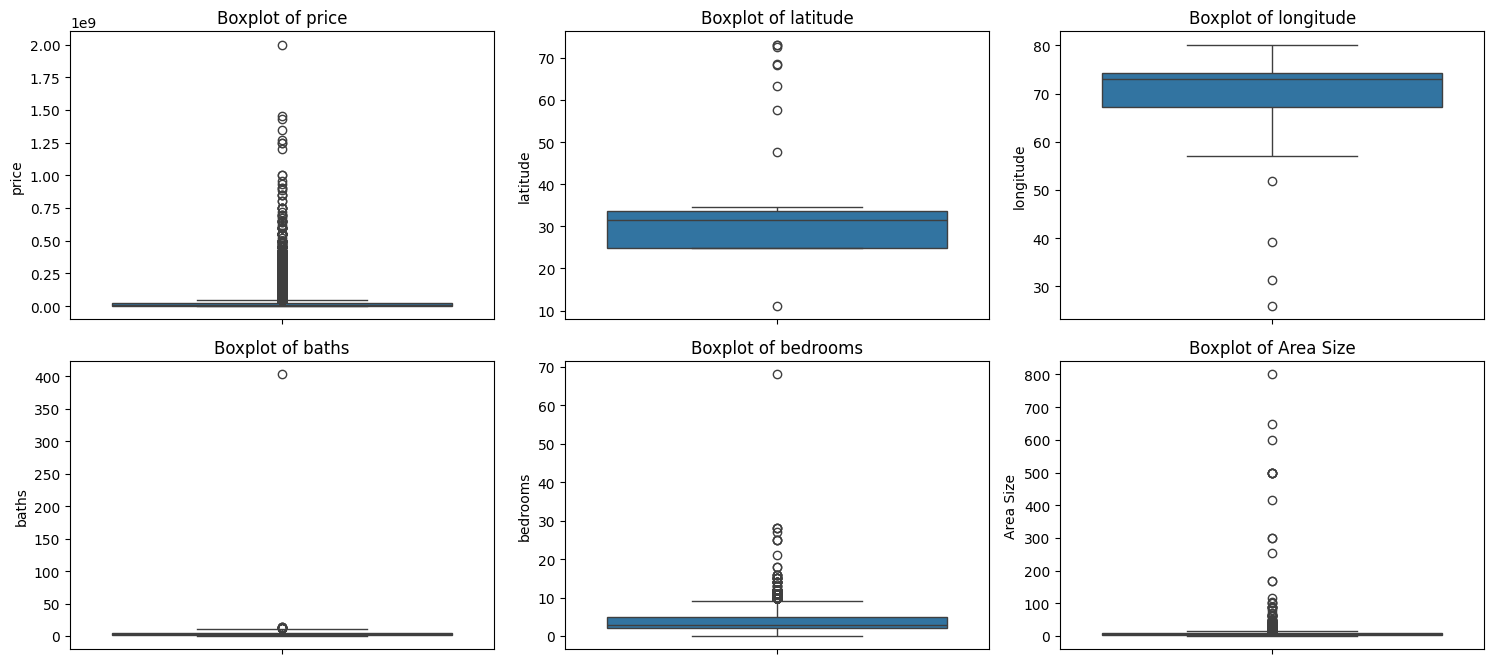

In [181]:
# checking for outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [182]:
# Identifying outliers using IQR method
for col in ['Area Size', 'price', 'baths', 'bedrooms']:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f'{col}: {len(outliers)} outliers')


Area Size: 3128 outliers
price: 12292 outliers
baths: 17 outliers
bedrooms: 1074 outliers


##### Point to note:  
The dataset contains outliers

---

### **Feature Engineering**

In [183]:
#creating new feature for area size in square feet
df['area_sqft'] = np.where(
    df['Area Type'] == 'Marla', df['Area Size'] * 272,
    np.where(df['Area Type'] == 'Kanal', df['Area Size'] * 5445, df['Area Size'])
)


In [184]:
df['price_per_sqft'] = df['price'] / df['area_sqft']


### **Exploratory Data Analysis**

In [185]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categoric_cols = df.select_dtypes(include=['object']).columns.tolist()

In [186]:
df['purpose'].value_counts()

purpose
For Sale    106352
For Rent     41605
Name: count, dtype: int64

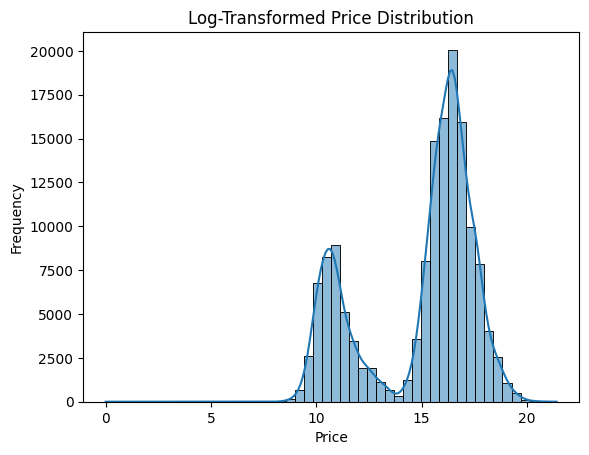

In [187]:
# price distribution for properties on sale 
# sns.histplot(data=df[df['purpose'] == 'For Sale'], x='price',bins=100, kde=True)
# plt.title('Price Distribution for Sale Properties')
# plt.xlabel('Price (in crores)')

sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.show()

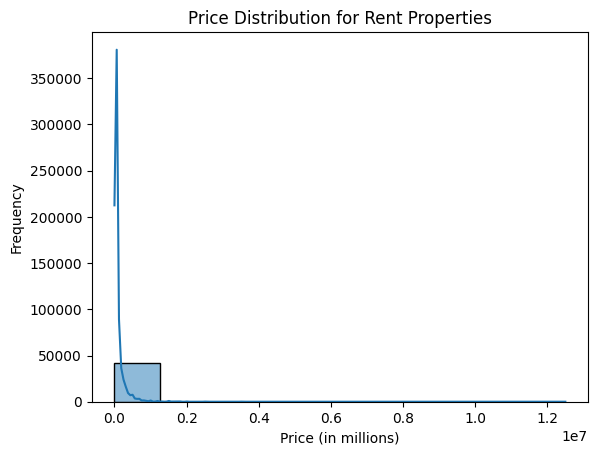

In [188]:
# price distribution for properties on sale
sns.histplot(data=df[df['purpose'] == 'For Rent'], x='price',bins=10, kde=True)
plt.title('Price Distribution for Rent Properties')
plt.xlabel('Price (in millions)')
plt.ylabel('Frequency') 
plt.show()

In [189]:
df['Area Type'].value_counts()

Area Type
Marla    119714
Kanal     28243
Name: count, dtype: int64

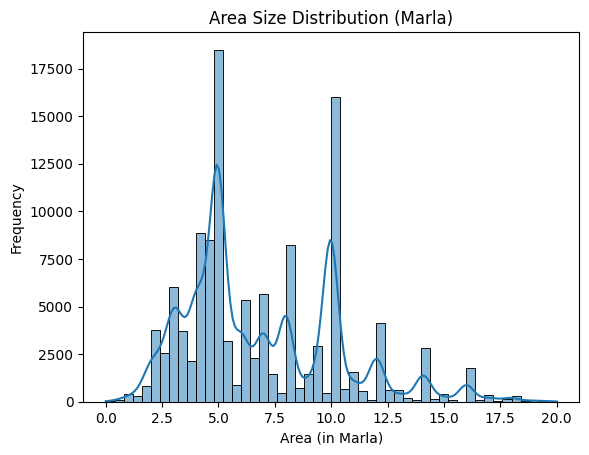

In [190]:
# Area Size distribution for Area Type 'Marla'
sns.histplot(data=df[df['Area Type'] == 'Marla'], x='Area Size',bins=50, kde=True)
plt.title('Area Size Distribution (Marla)')
plt.xlabel('Area (in Marla)')
plt.ylabel('Frequency') 
plt.show()

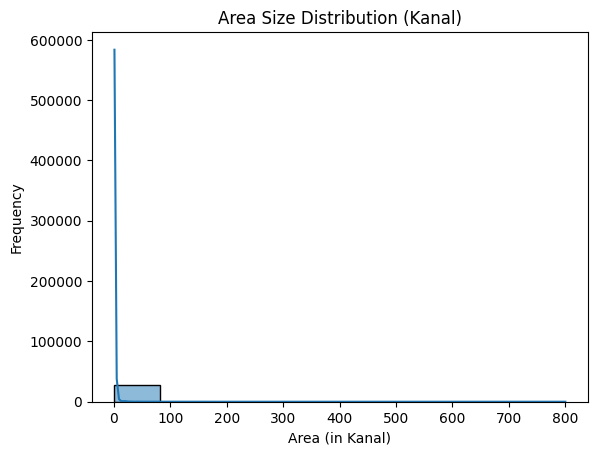

In [191]:
# Area Size distribution for Area Type 'Kanal'
sns.histplot(data=df[df['Area Type'] == 'Kanal'], x='Area Size',bins=10, kde=True)
plt.title('Area Size Distribution (Kanal)')
plt.xlabel('Area (in Kanal)')
plt.ylabel('Frequency') 
plt.show()

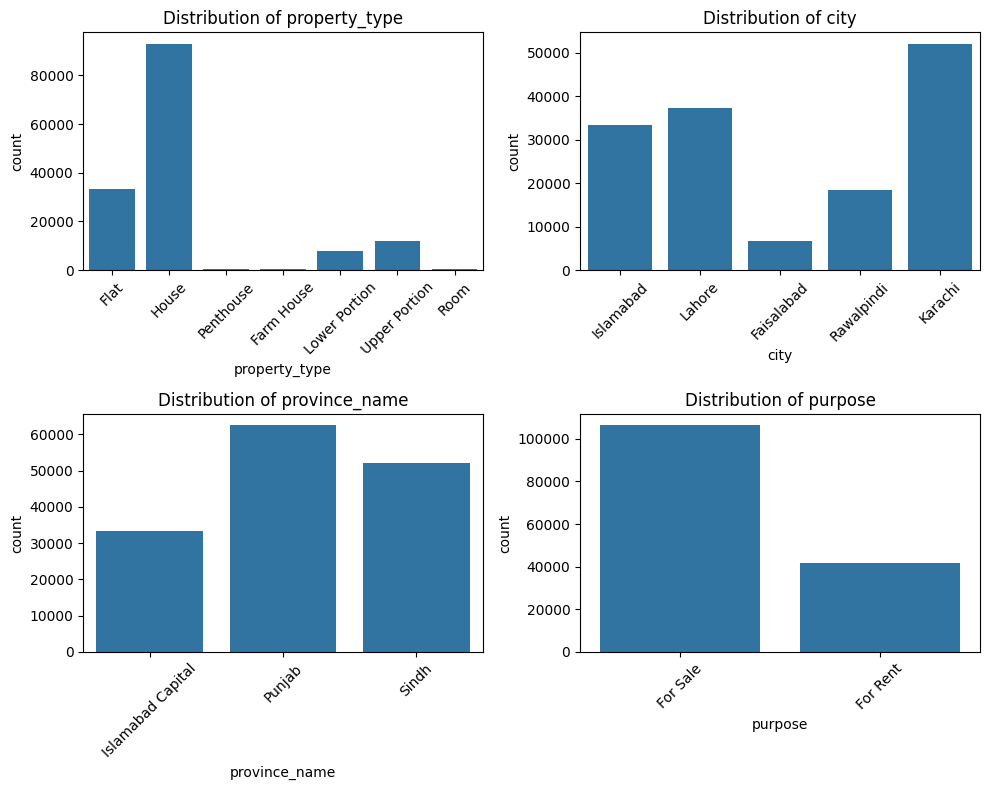

In [192]:
# categorical feature distributions
n_cols = 2
n_rows= 2
fig, axes = plt.subplots(n_cols, n_rows,figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()
for i, col in enumerate(['property_type', 'city', 'province_name', 'purpose']):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

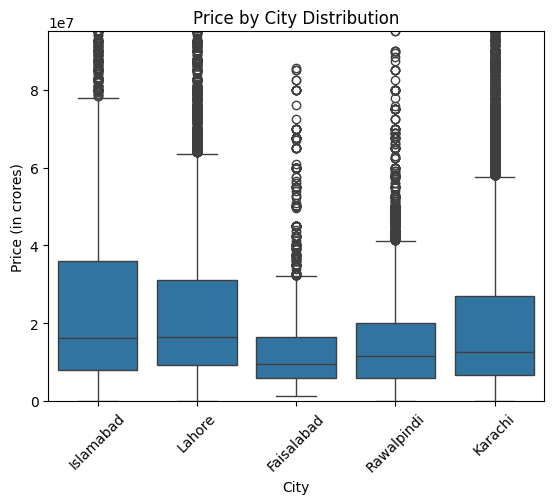

In [193]:
# price(For Sale) by city distribution
sns.boxplot(x='city', y='price', data=df[df['purpose'] == 'For Sale'])
plt.title('Price by City Distribution')
plt.xlabel('City')
plt.ylabel('Price (in crores)')
plt.xticks(rotation=45)
plt.ylim(0, df['price'].quantile(0.97))
plt.show()

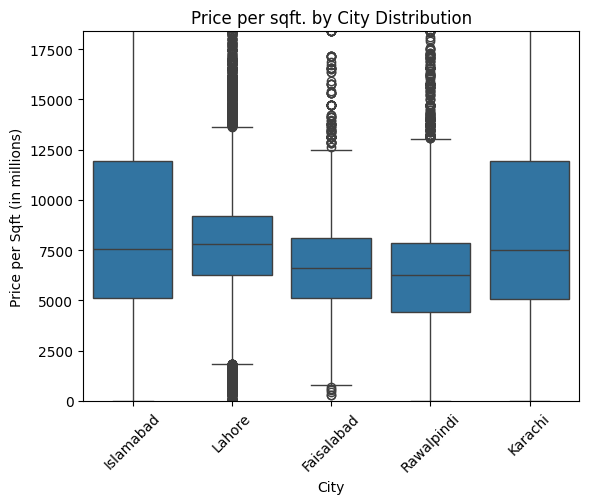

In [199]:
# price per unit area ( for sale) by city distribution
sns.boxplot(x='city', y=df['price']/df['area_sqft'], data=df[df['purpose'] == 'For Sale'])
plt.title('Price per sqft. by City Distribution')
plt.xlabel('City')
plt.ylabel('Price per Sqft (in millions)')
plt.xticks(rotation=45)
plt.ylim(0, df['price_per_sqft'].quantile(0.97))
plt.show()

Text(0.5, 1.0, 'Price per Sqft Distribution')

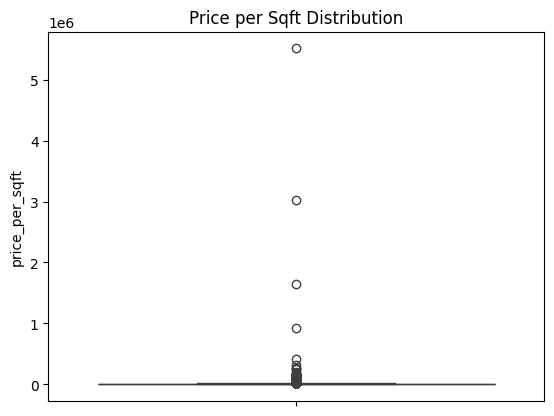

In [203]:
# checking price per sqft distribution using boxplot
sns.boxplot(y=df['price_per_sqft'])
plt.title('Price per Sqft Distribution')

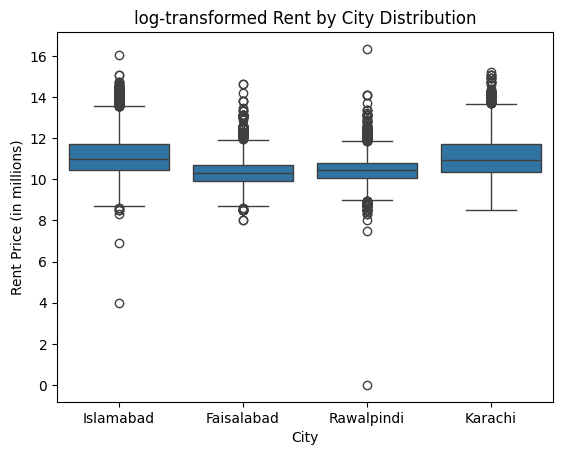

In [195]:
# price(For Rent) by city distribution
sns.boxplot(x='city', y=np.log1p(df['price']), data=df[df['purpose'] == 'For Rent'])
plt.title('log-transformed Rent by City Distribution')
plt.xlabel('City')
plt.ylabel('Rent Price (in millions)')
# plt.ylabel('Rent Price (in millions)')

plt.show()

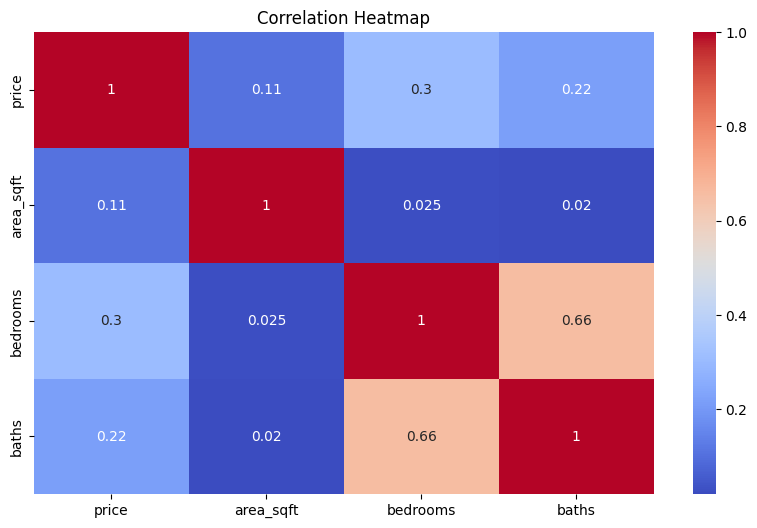

In [196]:
# correlation heatmap
# sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
corr_cols = ['price', 'area_sqft', 'bedrooms', 'baths']

plt.figure(figsize=(10, 6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [204]:
#dropping unnecessary columns
df = df.drop(['Area Size', 'Area Type', 'area'], axis=1)

In [205]:
df.to_csv('cleaned_data.csv', index=False)